In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from analysis import get_data
from analysis import read_log, read_logs
from analysis import generate_average

In [7]:
size = 1000
tag = "multiprocessing_mergesort"
files = ["alex", "gregor"]

In [8]:
data = []

for file in files:
    _data = read_log(file, size=size)
    data = data + _data

In [4]:
data

[[12, 0.814, 1000, 'alex', 'multiprocessing_mergesort'],
 [12, 0.665, 1000, 'alex', 'multiprocessing_mergesort'],
 [12, 0.644, 1000, 'alex', 'multiprocessing_mergesort'],
 [12, 0.641, 1000, 'alex', 'multiprocessing_mergesort'],
 [12, 0.632, 1000, 'alex', 'multiprocessing_mergesort'],
 [12, 0.644, 1000, 'alex', 'multiprocessing_mergesort'],
 [12, 0.66, 1000, 'alex', 'multiprocessing_mergesort'],
 [12, 0.654, 1000, 'alex', 'multiprocessing_mergesort'],
 [12, 0.735, 1000, 'alex', 'multiprocessing_mergesort'],
 [12, 0.682, 1000, 'alex', 'multiprocessing_mergesort'],
 [11, 0.622, 1000, 'alex', 'multiprocessing_mergesort'],
 [11, 0.599, 1000, 'alex', 'multiprocessing_mergesort'],
 [11, 0.609, 1000, 'alex', 'multiprocessing_mergesort'],
 [11, 0.652, 1000, 'alex', 'multiprocessing_mergesort'],
 [11, 0.641, 1000, 'alex', 'multiprocessing_mergesort'],
 [11, 0.708, 1000, 'alex', 'multiprocessing_mergesort'],
 [11, 0.673, 1000, 'alex', 'multiprocessing_mergesort'],
 [11, 0.649, 1000, 'alex', 'mult

In [20]:
df = pd.DataFrame(data = data, 
                  columns = ["processors", "time", "size", "name", "tag"])
# df["speedup"] = df["time"].max()  / df["time"] 
df["time"]

0      0.814
1      0.665
2      0.644
3      0.641
4      0.632
       ...  
147    0.006
148    0.007
149    0.005
150    0.007
151    0.005
Name: time, Length: 152, dtype: float64

In [9]:
def plot_benchmark_by_size(df, size=None, tag=None, files=None, x="processors", y="time"):
    names = "-".join(files)
    sns.lineplot(data=df, x=x, y=y, hue="name");
    t = tag.title()
    label = f"{t}, Size={size}".replace("_", " ")
    plt.title(f"{label}")
    if "time" in y: y = f"{y}/s"
    if "time" in x: x = f"{x}/s"
    plt.xlabel(x.capitalize())
    plt.ylabel(y.capitalize())
    plt.savefig(f"images/by-size-{size}-{tag}-{names}.png")
    plt.savefig(f"images/by-size-{size}-{tag}-{names}.pdf")
   

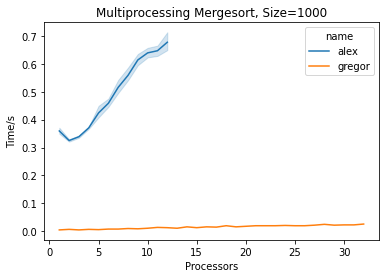

In [10]:
plot_benchmark_by_size(df, size, tag, files)

In [21]:
avg = pd.DataFrame()
for name in files:
    _df = generate_average(df, tag="multiprocessing_mergesort", name=name, size=size)
    avg = pd.concat([avg, _df])
avg

,,,,time,tag,name
processors,name,size,tag,,,
1,alex,1000,multiprocessing_mergesort,0.3594,multiprocessing_mergesort,alex
2,alex,1000,multiprocessing_mergesort,0.3251,multiprocessing_mergesort,alex
3,alex,1000,multiprocessing_mergesort,0.3388,multiprocessing_mergesort,alex
4,alex,1000,multiprocessing_mergesort,0.3705,multiprocessing_mergesort,alex
5,alex,1000,multiprocessing_mergesort,0.4240,multiprocessing_mergesort,alex
6,alex,1000,multiprocessing_mergesort,0.4586,multiprocessing_mergesort,alex
7,alex,1000,multiprocessing_mergesort,0.5156,multiprocessing_mergesort,alex
8,alex,1000,multiprocessing_mergesort,0.5585,multiprocessing_mergesort,alex
9,alex,1000,multiprocessing_mergesort,0.6137,multiprocessing_mergesort,alex


In [61]:
speedup = pd.DataFrame(avg)
# speedup["p"] = speedup.index.get_level_values(0).astype(float)

_speedup = []
for name in files:
    df = speedup[speedup['name'] == name]
    linear = df.query('processors == 1')
    #print(linear)
    #print(linear["time"].astype(float))
    #print(linear["time"])
    print(linear["time"].astype(float) / df["time"])
#_speedup

#speedup["speedup"] = speedup["time"].max() / speedup["time"]

processors  name  size  tag                      
1           alex  1000  multiprocessing_mergesort    1.0
2           alex  1000  multiprocessing_mergesort    NaN
3           alex  1000  multiprocessing_mergesort    NaN
4           alex  1000  multiprocessing_mergesort    NaN
5           alex  1000  multiprocessing_mergesort    NaN
6           alex  1000  multiprocessing_mergesort    NaN
7           alex  1000  multiprocessing_mergesort    NaN
8           alex  1000  multiprocessing_mergesort    NaN
9           alex  1000  multiprocessing_mergesort    NaN
10          alex  1000  multiprocessing_mergesort    NaN
11          alex  1000  multiprocessing_mergesort    NaN
12          alex  1000  multiprocessing_mergesort    NaN
Name: time, dtype: float64
processors  name    size  tag                      
1           gregor  1000  multiprocessing_mergesort    1.0
2           gregor  1000  multiprocessing_mergesort    NaN
3           gregor  1000  multiprocessing_mergesort    NaN
4         

In [25]:
speedup

,,,,time,tag,name,p,speedup
processors,name,size,tag,,,,,
1,alex,1000,multiprocessing_mergesort,0.3594,multiprocessing_mergesort,alex,1.0,1.883973
2,alex,1000,multiprocessing_mergesort,0.3251,multiprocessing_mergesort,alex,2.0,2.082744
3,alex,1000,multiprocessing_mergesort,0.3388,multiprocessing_mergesort,alex,3.0,1.998524
4,alex,1000,multiprocessing_mergesort,0.3705,multiprocessing_mergesort,alex,4.0,1.827530
5,alex,1000,multiprocessing_mergesort,0.4240,multiprocessing_mergesort,alex,5.0,1.596934
6,alex,1000,multiprocessing_mergesort,0.4586,multiprocessing_mergesort,alex,6.0,1.476450
7,alex,1000,multiprocessing_mergesort,0.5156,multiprocessing_mergesort,alex,7.0,1.313227
8,alex,1000,multiprocessing_mergesort,0.5585,multiprocessing_mergesort,alex,8.0,1.212355
9,alex,1000,multiprocessing_mergesort,0.6137,multiprocessing_mergesort,alex,9.0,1.103308


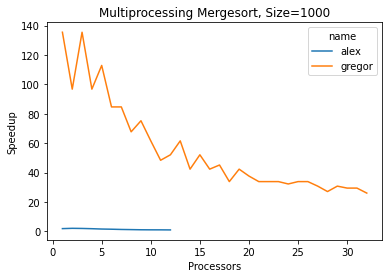

In [26]:
plot_benchmark_by_size(avg, size=size, tag=tag, files=files, x="processors", y="speedup")

In [ ]:
speedup["efficiency"] = speedup["speedup"] / 